### 케라스 사용법
 - 케라스 추가
   - import tensorflow.keras
   - import keras
 - 케라스 모델 생성 및 학습 순서
  1. 모델 생성
  2. 레이어 추가
  3. 모델 설정
  4. 학습
  5. 검증

 - 모델 생성1: tf.keras.models.Sequential
  - from keras.models import Sequential
  - model = Sequential()
 - 레이어 추가: model.add
  - model.add(layer)
 - 레이어 종류
    - Dense: tf.keras.layers.Dense
    - CNN: Conv2D, Maxpool2D
    - RNN: RNN, LSTM, GRU
    - Embedding(input_dim, output_dim)
    - Dropout(rate)
    - Concatenate()
    - Flatten()
 - Dense: Dense(units, activation, input_shape)



- 모델 생성2: tf.keras.models.Model (입력층, 출력층)
  - Input(shape)
  - 함수형 API로 구성하는 방법
  - input = Input(shape)
  - output = 레이어(변수초기화)(입력)
  - model = Model(input, output)

  - 모델 설정: model.compile
    - model.compile(loss= , optimizer=, metrics=[])
    - loss: 손실함수
    - optimizer: 옵티마이저
    - metrics: 측도
  - 모델 학습: fit
    - fit(X, y, batch_size, epochs, verbose, callbacks, validation_split,...)
    - history = model.fit(X, y,....)
    - history.history -> 사전 (train loss, train metrics, valid loss, valid metrics)
  - 모델 평가:
    - model.predict(X): 값 예측
    - model.evaluate(X, y): 측도 평가
  - 모델 저장/불러오기
    - model.save(파일명)
    - model = tf.keras.models.load_model(파일명)
  - 구성된 모델(레이어)을 확인하는 함수
    - model.summary()


In [1]:
# GPU 활용 시 메모리 문제가 있으면 학습 코드 실행 전 실행
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
import numpy as np

# mnist 데이터 로드
mnist = mnist.load_data()
(X_train, y_train), (X_test, y_test) = mnist

# 정규화
(X_train, X_test) = (np.float32(X_train)/255, np.float32(X_test)/255)

# 입력 형태로 변환
n_input = 28*28
(X_train, X_test) = (X_train.reshape(-1, n_input), X_test.reshape(-1, n_input))

# Sequential 모델 생성
model=Sequential()
model.add(Dense(10, input_shape=(784,), activation='softmax'))
model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train, batch_size=100, epochs=10, validation_split=0.2)

Epoch 1/10
480/480 [==============================] - 1s 1ms/step - loss: 0.6990 - accuracy: 0.8250 - val_loss: 0.3849 - val_accuracy: 0.8994
Epoch 2/10
480/480 [==============================] - 0s 1ms/step - loss: 0.3711 - accuracy: 0.8998 - val_loss: 0.3207 - val_accuracy: 0.9132
Epoch 3/10
480/480 [==============================] - 0s 989us/step - loss: 0.3266 - accuracy: 0.9093 - val_loss: 0.2989 - val_accuracy: 0.9169
Epoch 4/10
480/480 [==============================] - 0s 1ms/step - loss: 0.3055 - accuracy: 0.9149 - val_loss: 0.2885 - val_accuracy: 0.9208
Epoch 5/10
480/480 [==============================] - 0s 986us/step - loss: 0.2934 - accuracy: 0.9171 - val_loss: 0.2778 - val_accuracy: 0.9227
Epoch 6/10
480/480 [==============================] - 0s 981us/step - loss: 0.2845 - accuracy: 0.9200 - val_loss: 0.2742 - val_accuracy: 0.9250
Epoch 7/10
480/480 [==============================] - 0s 986us/step - loss: 0.2786 - accuracy: 0.9220 - val_loss: 0.2716 - val_accuracy: 0.926

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

inp = Input(shape=(784,))
out = Dense(10, activation='softmax')(inp)

model2 = Model(inp, out)
model2.summary()
model2.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model2.fit(X_train,y_train, batch_size=100, epochs=10, validation_split=0.2)

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
480/480 [==============================] - 1s 1ms/step - loss: 0.6936 - accuracy: 0.8280 - val_loss: 0.3835 - val_accuracy: 0.9030
Epoch 2/10
480/480 [==============================] - 0s 977us/step - loss: 0.3706 - accuracy: 0.9008 - val_loss: 0.3227 - val_accuracy: 0.9132
Epoch 3/10
480/480 [==============================] - 0s 980us/step - loss: 0.3264 - accuracy: 0.9094 - val_loss: 0.2989 - val_accuracy: 0.9187
Epoch 4/10
480/480 [==============================] - 0s 974us/step - loss: 0.3056 -

In [33]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2676 - accuracy: 0.9253


[0.26761117577552795, 0.9253000020980835]

In [34]:
model2.predict(X_test)

array([[1.0631236e-05, 2.7236952e-10, 2.2327604e-05, ..., 9.9416107e-01,
        2.3105027e-05, 5.9748720e-04],
       [2.8624071e-04, 1.1133922e-05, 9.9256212e-01, ..., 5.0003701e-15,
        1.0971792e-04, 6.6658734e-11],
       [9.2415048e-06, 9.7689706e-01, 1.0763544e-02, ..., 1.7810290e-03,
        4.7140666e-03, 3.7732927e-04],
       ...,
       [8.0881996e-08, 1.0535971e-07, 9.3229219e-06, ..., 1.6735337e-03,
        6.1928364e-03, 3.2052640e-02],
       [5.2407790e-07, 1.3917567e-06, 1.3185776e-06, ..., 5.2720293e-07,
        1.6120801e-02, 1.4761778e-06],
       [6.1256242e-06, 9.1495702e-13, 6.2527499e-05, ..., 5.1710365e-11,
        9.6889977e-08, 2.4108564e-09]], dtype=float32)

In [35]:
model3 = tf.keras.models.load_model('test_model.h5')
model3.evaluate(X_test, y_test)

313/313 [==============================] - 0s 904us/step - loss: 0.2676 - accuracy: 0.1011


[0.26761117577552795, 0.10109999775886536]

In [36]:
import numpy as np
from sklearn.metrics import accuracy_score

accuracy_score(y_test, np.argmax(model3.predict(X_test), axis=-1))

0.9253

#### 분류 분석의 평가 지표
 - Confusion Matrix: 실제 분류와 예측 분류를 아래의 4가지 케이스로 구분하여 개수를 표현
  * True Positive: 정답, 예측 모두 참 (맞음)
  * True Negative: 정답, 예측 모두 거짓 (맞음)
  * False Positive: 정답은 거짓, 예측은 참 (틀림)
  * False Negative: 정답은 참, 예측은 거짓 (틀림)

 - 위 네 개 케이스를 이용하여 아래와 같은 지표를 계산
  * 정확도 (accuracy) = TP+TN/TP+TN+FP+FN
  * 오차율 (error rate) = 1-accuracy
  * 정밀도 (precision) = TP/TP+FP
    - 참 범주로 예측할 때 얼마나 정확한지 평가하는 척도
  * 재현율/민감도 (recall/sensitivity) = TP/TP+FN
    - 실제 전체 참 중 맞춘 참의 비율
  * 특이도 (specificity): TN/FP+TN
    - 실제 전체 거짓 중 맞춘 거짓의 비율
  * 거짓 긍정률 (False Positive Rate) = 1-특이도
  * ROC (Receiver Operating Characteristic) Curve
    - 민감도와 특이도의 2차원 그래프로 거짓 긍정 값에 따른 참 긍정 비율을 나타냄
    - ROC의 면접을 AUC (Area of under ROC Curve)라 부르며 AUC가 넓으면 좋은 모델 (80퍼센트 이상)

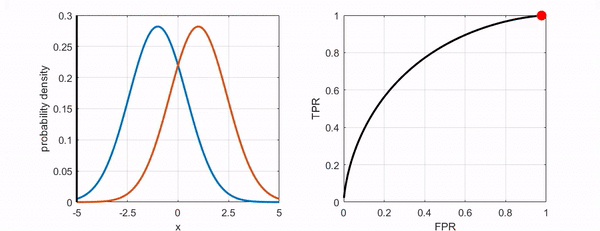
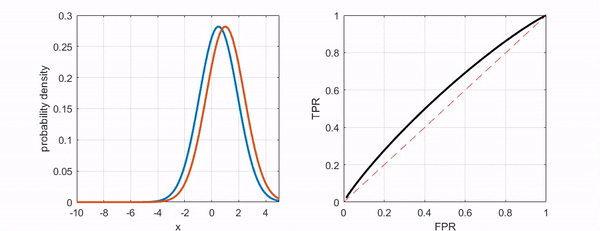

#### 평가 지표 함수
 - scikit-learn의 metrics 함수 이용
 - from sklearn.metrics import 함수
 - 사용법: 함수(y, y_pred)

In [38]:
import sklearn

dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'PrecisionRecallDisplay',
 'RocCurveDisplay',
 'SCORERS',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'davies_bouldin_score',
 'dcg_score',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fbeta_score',
 'fowlkes_mallows_score',
 'get_scorer',
 'hamming_loss',
 'hinge_loss',
 'homogeneity_completeness_v_measure',
 'homogeneity_score',
 'jaccard_score',
 'label_ranking_average_precision_score',
 'label_rank

### 학습 종류 별 설정 방법
 - Loss
   - 분류
     - 이항: binary_crossentropy
     - 다항
       - 정수: sparse_categorical_crossentropy
       - onehot: categorical_crossentropy
   - 회귀: mse
 - optimizer: rmsprop or adam
 - metrics
   - 분류: accuracy
   - 회귀: mse/mae
 - activation
   - 은닉층: relu
   - 출력층
     - 분류
       - 이항: sigmoid
       - 다항: softmax
     - 회귀: 없음 
 - 출력 층의 뉴런 수
   - 분류
     - 이항: 1개
     - 다항: n개
   - 회귀: 1개

### Callbacks
  - 매 batch마다 실행되는 함수
  - EarlyStopping(monitor, patience, min_delta)
    1. monitor: 감시 대상
    2. patience: 몇 epoch/batch까지 개선 없는 걸 기다려줄지 정함
    3. min_delta: 관찰 대상인 값의 변화량
  - fit 함수 callbacks=에 지정